In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, r2_score

In [58]:
pima_df = pd.read_csv('pima_indian_diabetes.csv')
pima_df.shape

(768, 9)

In [59]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [60]:
pima_df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
522,6,114,0,0,0,0.0,0.189,26,0
3,1,89,66,23,94,28.1,0.167,21,0
458,10,148,84,48,237,37.6,1.001,51,1
476,2,105,80,45,191,33.7,0.711,29,1
521,3,124,80,33,130,33.2,0.305,26,0


In [61]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [62]:
#Univariate Analysis
columns= pima_df.columns

In [63]:
# Function to compute univariate statistics
def univariate_analysis(df, cols):
    results = {}
    for col in cols:
        mean= df[col].mean()
        median= df[col].median()
        mode= df[col].mode()[0] # Mode can have multiple values, so take the first one
        variance= df[col].var()
        std_dev = df[col].std()
        skewness= df[col].skew()
        kurtosis= df[col].kurtosis()
        results[col] = {
        
        'Mean': mean,
        'Median': median,
        'Mode' : mode,
        'Variance': variance,
        'Standard Deviation': std_dev,
        'Skewness': skewness,
        'Kurtosis': kurtosis
        }
    return pd.DataFrame(results).T
    

In [64]:
univariate_results = univariate_analysis(pima_df, columns)
univariate_results

,Mean,Median,Mode,Variance,Standard Deviation,Skewness,Kurtosis
Pregnancies,3.845052,3.0000,1.000,11.354056,3.369578,0.901674,0.159220
Glucose,120.894531,117.0000,99.000,1022.248314,31.972618,0.173754,0.640780
BloodPressure,69.105469,72.0000,70.000,374.647271,19.355807,-1.843608,5.180157
SkinThickness,20.536458,23.0000,0.000,254.473245,15.952218,0.109372,-0.520072
Insulin,79.799479,30.5000,0.000,13281.180078,115.244002,2.272251,7.214260
BMI,31.992578,32.0000,32.000,62.159984,7.884160,-0.428982,3.290443
DiabetesPedigreeFunction,0.471876,0.3725,0.254,0.109779,0.331329,1.919911,5.594954
Age,33.240885,29.0000,22.000,138.303046,11.760232,1.129597,0.643159
Outcome,0.348958,0.0000,0.000,0.227483,0.476951,0.635017,-1.600930


In [65]:
def plot_univariate_distributions(df, cols):
    for col in cols:
        plt.figure(figsize=(12, 5))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

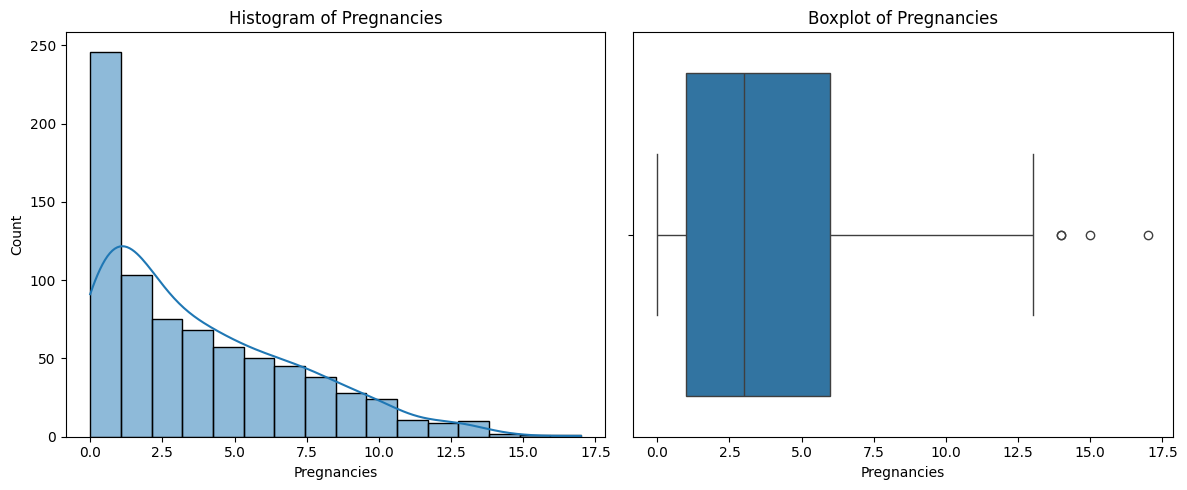

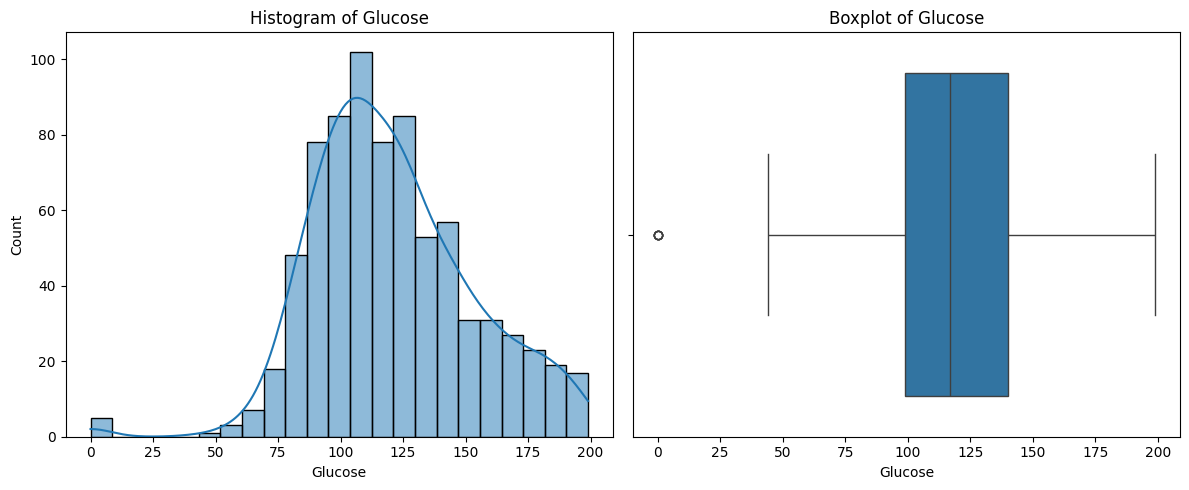

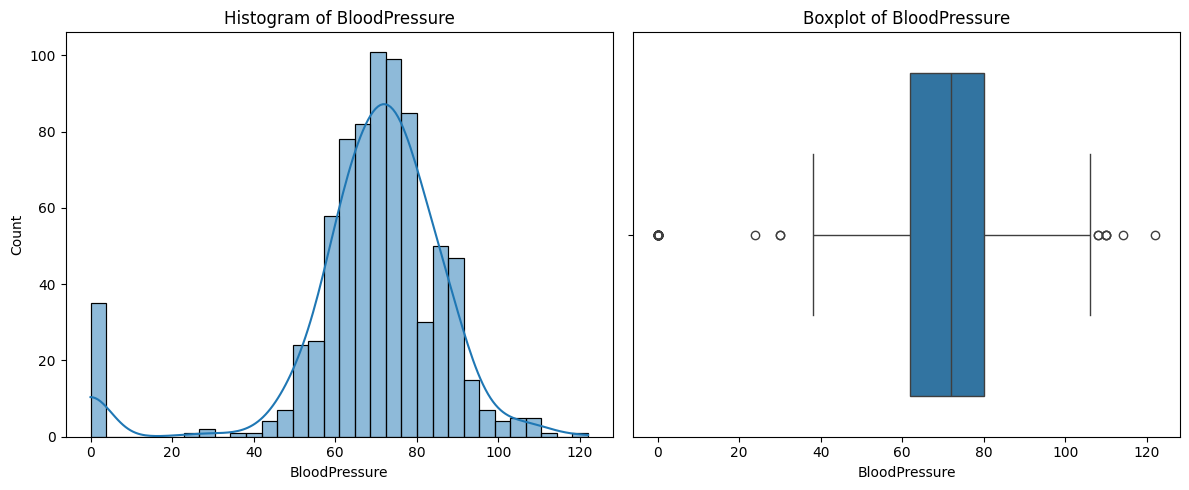

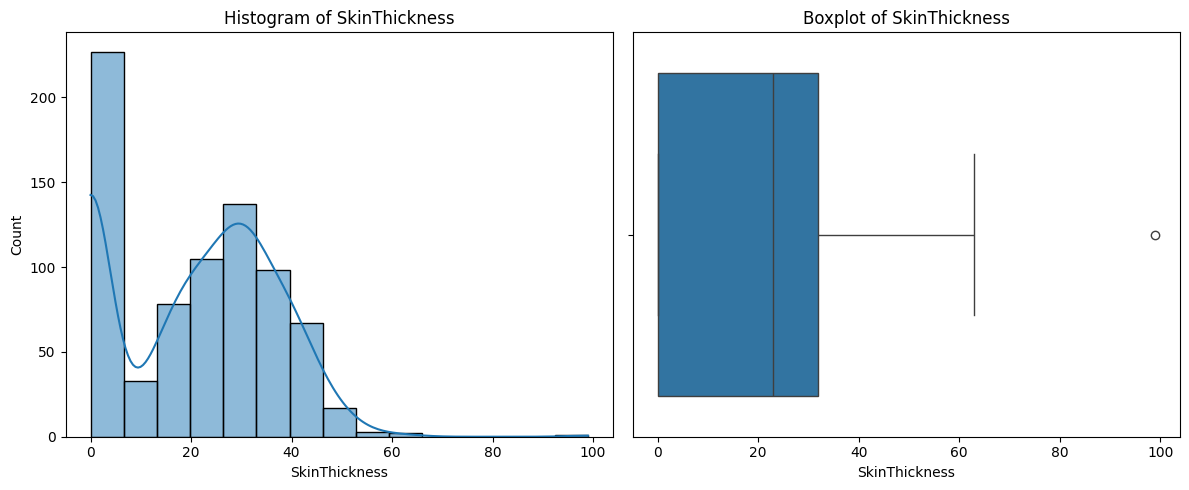

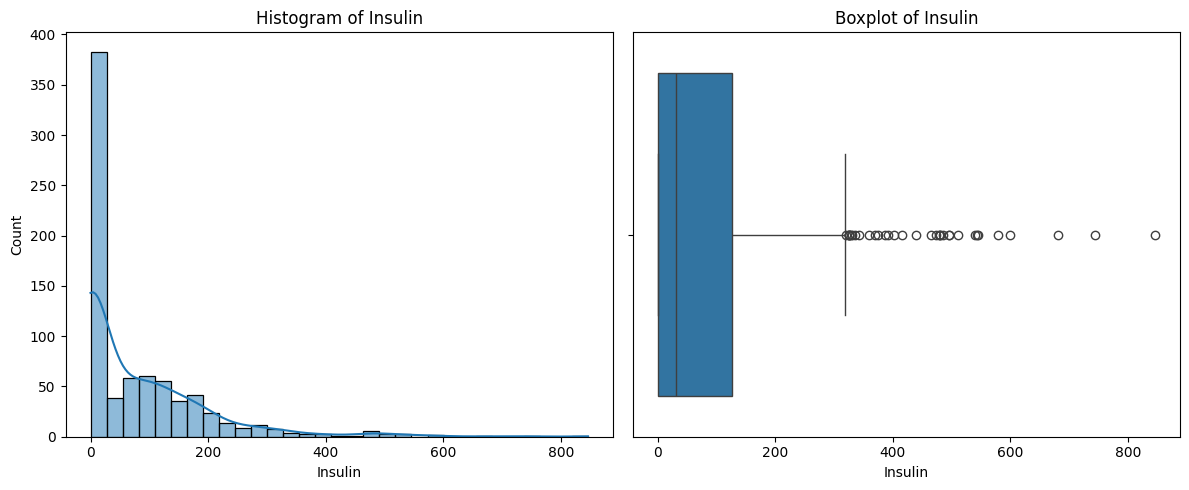

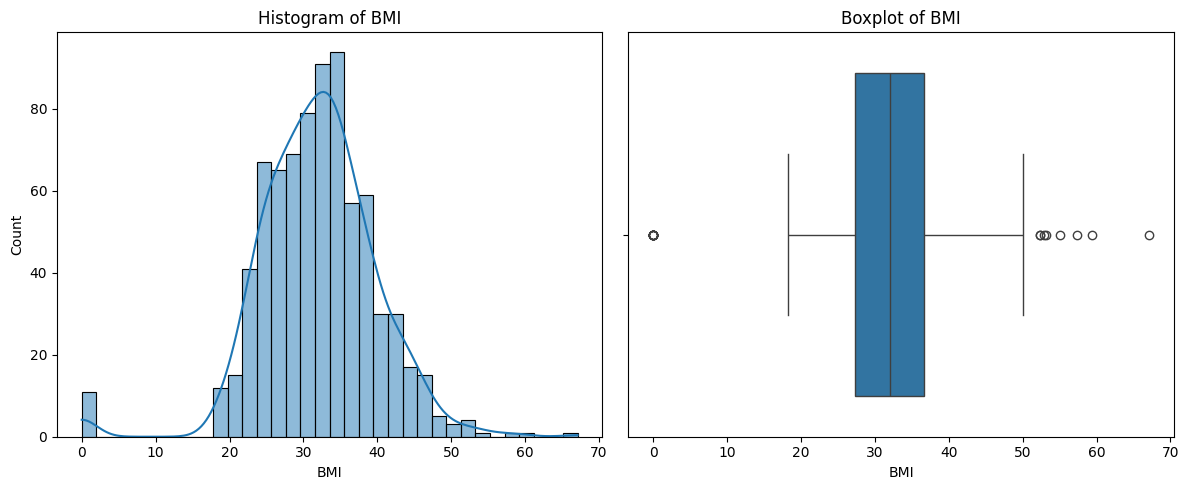

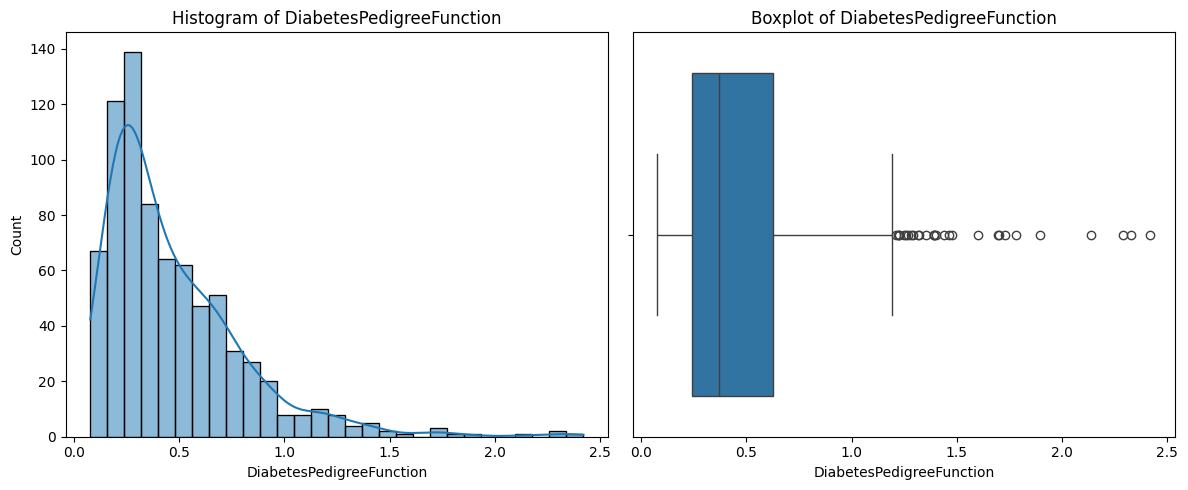

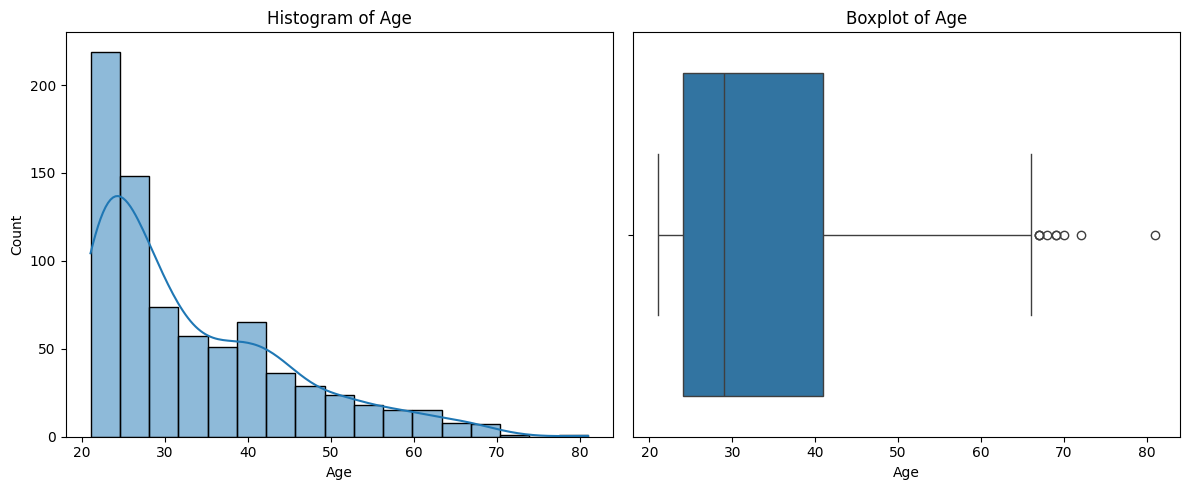

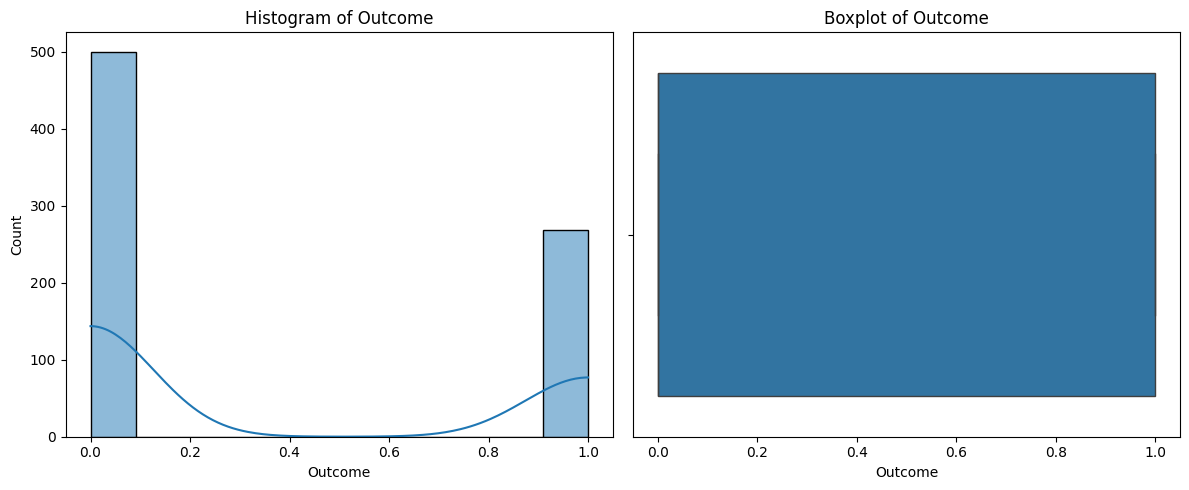

In [66]:
plot_univariate_distributions(pima_df, columns)

In [67]:
def detect_outliers_iqr(df, cols):
    outlier_info = {}
    for col in cols:
        Ql = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Ql
        lower_bound = Ql - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Find outliers
        outliers= df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        # Store results
        outlier_info[col] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Detected': len(outliers),
        'Outlier Percent': len(outliers) / len(df) * 100
        }
    return pd.DataFrame(outlier_info).T


In [68]:
outlier_results = detect_outliers_iqr(pima_df, columns)
outlier_results

,Lower Bound,Upper Bound,Outliers Detected,Outlier Percent
Pregnancies,-6.500,13.500,4.0,0.520833
Glucose,37.125,202.125,5.0,0.651042
BloodPressure,35.000,107.000,45.0,5.859375
SkinThickness,-48.000,80.000,1.0,0.130208
Insulin,-190.875,318.125,34.0,4.427083
BMI,13.350,50.550,19.0,2.473958
DiabetesPedigreeFunction,-0.330,1.200,29.0,3.776042
Age,-1.500,66.500,9.0,1.171875
Outcome,-1.500,2.500,0.0,0.000000


In [69]:
conditions= [
(pima_df['Pregnancies'] >= 0) & (pima_df['Pregnancies'] <= 13.5),
(pima_df['Glucose'] >= 37.125) & (pima_df['Glucose'] <= 202.125),
(pima_df['BloodPressure'] >= 35) & (pima_df['BloodPressure'] <= 107),
(pima_df['SkinThickness'] >= 0) & (pima_df['SkinThickness'] <= 80), 
(pima_df['Insulin'] >= 0) & (pima_df['Insulin'] <= 318.125),
(pima_df['BMI'] >= 13.35) & (pima_df['BMI'] <= 50.55),
(pima_df['DiabetesPedigreeFunction'] >= 0) & (pima_df['DiabetesPedigreeFunction'] <= 1.2),
(pima_df['Age'] >= 0) & (pima_df['Age'] <= 66.5)
]

In [70]:
combined_conditions = conditions[0]
for condition in conditions[1:]:
    combined_conditions &= condition

In [71]:
filtered_pima_df = pima_df[combined_conditions]

In [72]:
print(f"Original dataset size: {pima_df.shape}")
print(f"Filtered dataset size: {filtered_pima_df.shape}")

Original dataset size: (768, 9)
Filtered dataset size: (639, 9)


In [73]:
filtered_pima_df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
764,2,122,70,27,0,36.8,0.340,27,0
65,5,99,74,27,0,29.0,0.203,32,0
270,10,101,86,37,0,45.6,1.136,38,1
372,0,84,64,22,66,35.8,0.545,21,0
532,1,86,66,52,65,41.3,0.917,29,0


In [74]:
def check_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers= data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return lower_bound, upper_bound, len(outliers)

In [75]:
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [76]:
for column in columns_to_check:
    lower, upper, outliers_count = check_outliers(filtered_pima_df, column)
    print(f"{column} - Lower Bound: {lower:.3f}, Upper Bound: {upper:.3f}, Outliers Detected: {outliers_count}")

Pregnancies - Lower Bound: -6.500, Upper Bound: 13.500, Outliers Detected: 0
Glucose - Lower Bound: 42.000, Upper Bound: 194.000, Outliers Detected: 7
BloodPressure - Lower Bound: 40.000, Upper Bound: 104.000, Outliers Detected: 4
SkinThickness - Lower Bound: -48.000, Upper Bound: 80.000, Outliers Detected: 0
Insulin - Lower Bound: -180.000, Upper Bound: 300.000, Outliers Detected: 3
BMI - Lower Bound: 14.325, Upper Bound: 48.925, Outliers Detected: 4
DiabetesPedigreeFunction - Lower Bound: -0.274, Upper Bound: 1.102, Outliers Detected: 12
Age - Lower Bound: 0.000, Upper Bound: 64.000, Outliers Detected: 6


In [77]:
print("\nMin and Max values after filtering:")
filtered_pima_df[columns_to_check].agg(['min', 'max'])


Min and Max values after filtering:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
min,0,44,38,0,0,18.2,0.078,21
max,13,198,106,60,318,50.0,1.191,66


bivariate

In [ ]:
#bivariate
import statsmodels.api as sm

predictors = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

In [79]:
results = {}

In [80]:
for predictor in predictors:
    X = filtered_pima_df[[predictor]] # Use one predictor at a time
    X = sm.add_constant(X) # Adds a constant term to the predictor
    model= sm.OLS(y, X).fit() # Fit the model
    results[predictor] = model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1584: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/Library/Frameworks/Python.framew

ValueError: shapes (639,2) and (639,2) not aligned: 2 (dim 1) != 639 (dim 0)